In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
df=pd.read_csv("LoanApproval_Balanced_DTC.csv")

In [17]:
df

,Income,CreditScore,LoanAmount,EmploymentYears,Approved
0,149644,458,47710,25.84,1
1,115109,447,18139,12.87,1
2,37628,593,34896,17.73,0
3,64946,775,49389,15.68,0
4,83752,827,40007,13.32,1
...,...,...,...,...,...
245,40711,848,48168,21.63,0
246,57986,545,35056,5.43,0
247,103590,833,29053,13.40,1
248,33383,772,5332,15.83,1


In [18]:
df.columns

Index(['Income', 'CreditScore', 'LoanAmount', 'EmploymentYears', 'Approved'], dtype='object')

In [19]:
x=df[['Income', 'CreditScore', 'LoanAmount', 'EmploymentYears']].values
y=df['Approved']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=4,        # control complexity (you can tune this)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [22]:
y_pred = clf.predict(x_test)

In [23]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.90      0.72      0.80        25

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 8, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1, 2, 4, 6]
}

# 5. Set up GridSearchCV
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,          # use all CPU cores
    error_score="raise" # or "ignore" if you want to silence errors
)

# 6. Fit GridSearchCV
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Accuracy: 0.85


In [29]:
clf1 = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=5,        # control complexity (you can tune this)
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
clf1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [30]:
y_pred1 = clf1.predict(x_test)

In [31]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
acc = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))


Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.90      0.72      0.80        25

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



In [32]:


# 7. Use the best model
best_model = grid.best_estimator_

# 8. Predict on test data
y_pred = best_model.predict(x_test)

# 9. Evaluation on test set
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nTest Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=[0, 1],
    target_names=["Rejected", "Approved"],
    zero_division=0
))


Test Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.77      0.92      0.84        25
    Approved       0.90      0.72      0.80        25

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



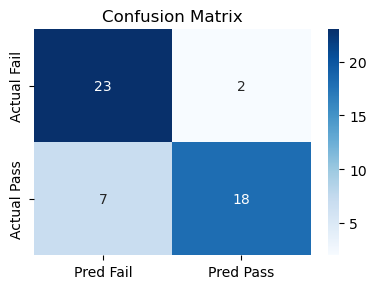

In [33]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Fail", "Pred Pass"],
            yticklabels=["Actual Fail", "Actual Pass"])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [34]:
new_applicant = np.array([[65000, 720, 15000, 5]])

# Predict using best model
prediction = best_model.predict(new_applicant)[0]

print("Prediction (0 = Rejected, 1 = Approved):", prediction)

# Human-readable output
if prediction == 1:
    print("Loan Approved ✔")
else:
    print("Loan Rejected ❌")

Prediction (0 = Rejected, 1 = Approved): 0
Loan Rejected ❌


In [35]:
df.columns

Index(['Income', 'CreditScore', 'LoanAmount', 'EmploymentYears', 'Approved'], dtype='object')

In [36]:
new_applicant = np.array([[85000, 1000, 100000, 9]])

# Predict using best model
prediction = best_model.predict(new_applicant)[0]

print("Prediction (0 = Rejected, 1 = Approved):", prediction)

# Human-readable output
if prediction == 1:
    print("Loan Approved ✔")
else:
    print("Loan Rejected ❌")

Prediction (0 = Rejected, 1 = Approved): 1
Loan Approved ✔
